GITHUB

In [ ]:
#Github repo: https://github.com/EmmaKorycki/CBIS-DDSM-mase-case-description-ANN.git

LOAD TRAIN SET

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

train_set = pd.read_csv("/content/mass_case_description_train_set.csv")
train_set

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


DATA CLEANING

In [ ]:
#Detect and remove outliers
# Using Z-score

z_scores = np.abs(stats.zscore(train_set.select_dtypes(include=np.number)))
train_set_clean = train_set[(z_scores < 3).all(axis=1)]  # remove rows with |z|>3
train_set

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [ ]:
#Data cleaning
#remove missing values
clean_train_set = train_set.dropna()
clean_train_set


,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


CORRELATION

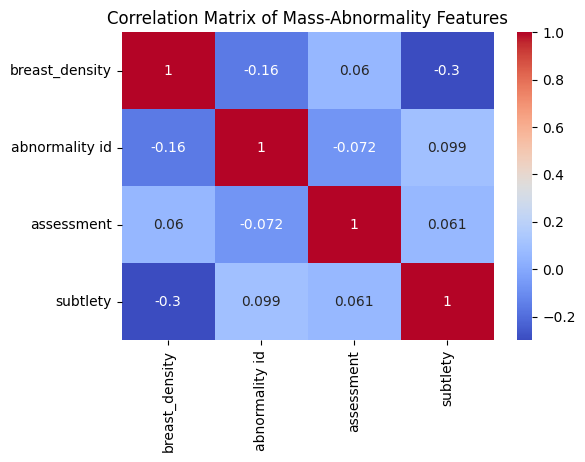

In [ ]:
#handle numeric features
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

temp_df = clean_train_set[['breast_density', 'abnormality id', 'assessment', 'subtlety']]
corr_matrix = temp_df.corr()

#heatmap of correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Mass-Abnormality Features")
plt.show()

In [ ]:
#CORRELATION
'''
For numeric features: compute and visualize correlation matrix; optionally remove features
that are weakly correlated witht the dependent variable. Use the code in Correlation
• For categorical features, if needed: compute independence using chi-square and remove
unrelated features Chi-square
'''

'\nFor numeric features: compute and visualize correlation matrix; optionally remove features\nthat are weakly correlated witht the dependent variable. Use the code in Correlation\n• For categorical features, if needed: compute independence using chi-square and remove\nunrelated features Chi-square\n'

In [ ]:
#handle categorical features
from scipy.stats import chi2_contingency
temp_train_set = train_set.dropna()

cat_cols = ["left or right breast", "image view", "abnormality type", "mass shape", "mass margins", "pathology" ]
#we treat breast desnisty, assessment, and sublety as categorical for tests of association
target = "pathology"
def chi_square_score(feature: str, target: str, df: pd.DataFrame) -> float:
    table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(table)
    return p #p-value
selected_features = []

for col in cat_cols:
    p = chi_square_score(col, target, temp_train_set)
    print(f"{col}: p-value = {p:.5f}")

    if p < 0.05:
        selected_features.append(col)

print("\nSelected categorical features:", selected_features)


#Drop unused columns
cleaner_train_set = clean_train_set.drop([
    'left or right breast',
    'image view',
    'abnormality type',
    'image file path',      #Clean out image file paths
    'cropped image file path',
    'ROI mask file path'
], axis=1)


left or right breast: p-value = 0.08989
image view: p-value = 0.07729
abnormality type: p-value = 1.00000
mass shape: p-value = 0.00000
mass margins: p-value = 0.00000
pathology: p-value = 0.00000

Selected categorical features: ['mass shape', 'mass margins', 'pathology']


PREPROCESSING

In [ ]:
#One-Hot encoding for columns with single label
single_label_cols = ['pathology']
new_train_set = pd.get_dummies(cleaner_train_set, columns = single_label_cols, prefix = single_label_cols, drop_first = False)

#Multi-label binarization(mass shape)
shape_col = 'mass shape'
shape_prefix = 'shape_is'
index_col_name = 'original_index' #temporary, new column name for unique ID

#To prepare for splitting: create unique ID column for merging
new_train_set = new_train_set.reset_index().rename(columns = {'index': index_col_name})
new_train_set[shape_col].fillna('')
#Split labels
train_set_split = new_train_set[[index_col_name, shape_col]].copy()
train_set_split['labels'] = (train_set_split[shape_col].str.split('-'))

#Explode and clean up
train_set_exploded = train_set_split.explode('labels')
train_set_exploded['labels'] = train_set_exploded['labels'].str.strip()
train_set_exploded = train_set_exploded[train_set_exploded['labels'] != '']

#Create binary matrix using crosstab
encoded_shape_df = pd.crosstab(train_set_exploded[index_col_name], train_set_exploded['labels'])
#Rename columns
encoded_shape_df.columns = [f"{shape_prefix}_{col}" for col in encoded_shape_df.columns]
encoded_shape_df = encoded_shape_df.reset_index()
#merge back
new_train_set = pd.merge(new_train_set, encoded_shape_df, on = index_col_name, how = 'left')
#drop original categorical column and the temporary index column
new_train_set = new_train_set.drop([index_col_name, shape_col], axis = 1)

#Fill NaNs created by left merge
new_train_set = new_train_set.fillna(0)


#Multi-label binarization(mass shape)
margins_col = 'mass margins'
margins_prefix = 'margins_are'
index_col_name = 'original_index' #temporary, new column name for unique ID

#To prepare for splitting: create unique ID column for merging
new_train_set = new_train_set.reset_index().rename(columns = {'index': index_col_name})
new_train_set[margins_col].fillna('')
#Split labels
train_set_split = new_train_set[[index_col_name, margins_col]].copy()
train_set_split['labels'] = (train_set_split[margins_col].str.split('-'))

#Explode and clean up
train_set_exploded = train_set_split.explode('labels')
train_set_exploded['labels'] = train_set_exploded['labels'].str.strip()
train_set_exploded = train_set_exploded[train_set_exploded['labels'] != '']

#Create binary matrix using crosstab
encoded_margins_df = pd.crosstab(train_set_exploded[index_col_name], train_set_exploded['labels'])
#Rename columns
encoded_margins_df.columns = [f"{margins_prefix}_{col}" for col in encoded_margins_df.columns]
encoded_margins_df = encoded_margins_df.reset_index()
#merge back
new_train_set = pd.merge(new_train_set, encoded_margins_df, on = index_col_name, how = 'left')
#drop original categorical column and the temporary index column
new_train_set = new_train_set.drop([index_col_name, margins_col], axis = 1)

#Fill NaNs created by left merge
new_train_set = new_train_set.fillna(0)

new_train_set.iloc[:, 8:16]
new_train_set.iloc[:, 8:20]
new_train_set.iloc[:, 0:15]



,patient_id,breast_density,abnormality id,assessment,subtlety,pathology_BENIGN,pathology_BENIGN_WITHOUT_CALLBACK,pathology_MALIGNANT,shape_is_ARCHITECTURAL_DISTORTION,shape_is_ASYMMETRIC_BREAST_TISSUE,shape_is_FOCAL_ASYMMETRIC_DENSITY,shape_is_IRREGULAR,shape_is_LOBULATED,shape_is_LYMPH_NODE,shape_is_OVAL
0,P_00001,3,1,4,4,False,False,True,1,0,0,1,0,0,0
1,P_00001,3,1,4,4,False,False,True,1,0,0,1,0,0,0
2,P_00004,3,1,4,3,True,False,False,1,0,0,0,0,0,0
3,P_00004,3,1,4,3,True,False,False,1,0,0,0,0,0,0
4,P_00004,3,1,4,5,True,False,False,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,P_02033,2,1,3,4,False,False,True,0,0,0,1,0,0,0
1269,P_02079,2,1,3,5,False,False,True,0,0,0,0,0,0,0
1270,P_02079,2,1,3,5,False,False,True,0,0,0,0,0,0,0
1271,P_02092,2,1,3,2,False,False,True,0,0,0,1,0,0,0


VISUALIZATION

/tmp/ipython-input-1494868408.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_data, labels = box_plot_labels)


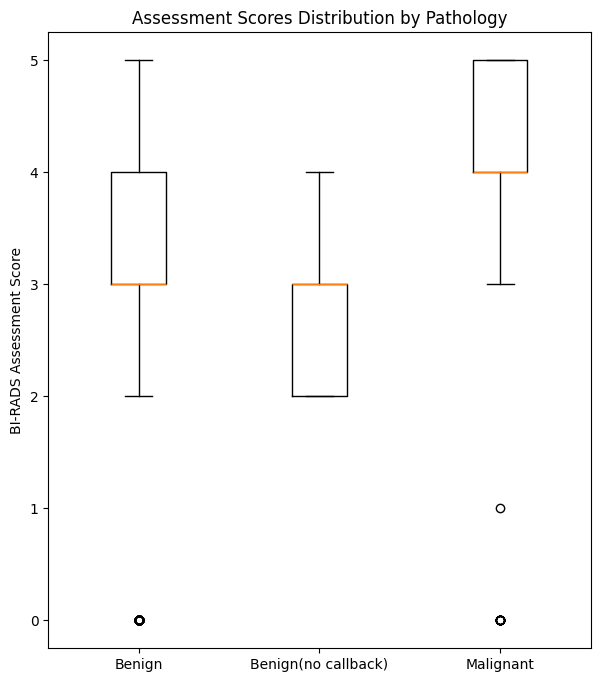

In [ ]:
#BOX PLOT(Assessment scores)
#Put data into lists to prepare for plt.boxplot
def prepare_box_plot_data(new_train_set):
    assessment_benign = new_train_set[new_train_set['pathology_BENIGN'] == True]['assessment'].tolist()
    assessment_benign_without_callback = new_train_set[new_train_set['pathology_BENIGN_WITHOUT_CALLBACK'] == True]['assessment'].tolist()
    assessment_malignant = new_train_set[new_train_set['pathology_MALIGNANT'] == True]['assessment'].tolist()


    return [assessment_benign, assessment_benign_without_callback, assessment_malignant], ['Benign', 'Benign(no callback)', 'Malignant']
box_plot_data, box_plot_labels = prepare_box_plot_data(new_train_set)
plt.figure(figsize=(7, 8))
plt.boxplot(box_plot_data, labels = box_plot_labels)
plt.title('Assessment Scores Distribution by Pathology')
plt.ylabel('BI-RADS Assessment Score')
plt.show()


The boxplot visualizes assessment(BI RADS) scores for the train dataset. BI_RADS scores range from 0-6 to assess risk, with 0 meaning incomplete exam, 1 being no cancer, 5 being highly suggestive of cancer, and 6 being for known biopsy-proven cancer.

The **benign** group has an outlier at 0, it's minimum at 2, median at 3.5, and its maximum at 5.
The **benign without callback** group has no outliers, a minimum at 2, median at 2.5, and maximum at 4.
The **malignant** group as an outlier at 0 and 1, a minimum at 3, median at 4.5, and a maximum at 5.

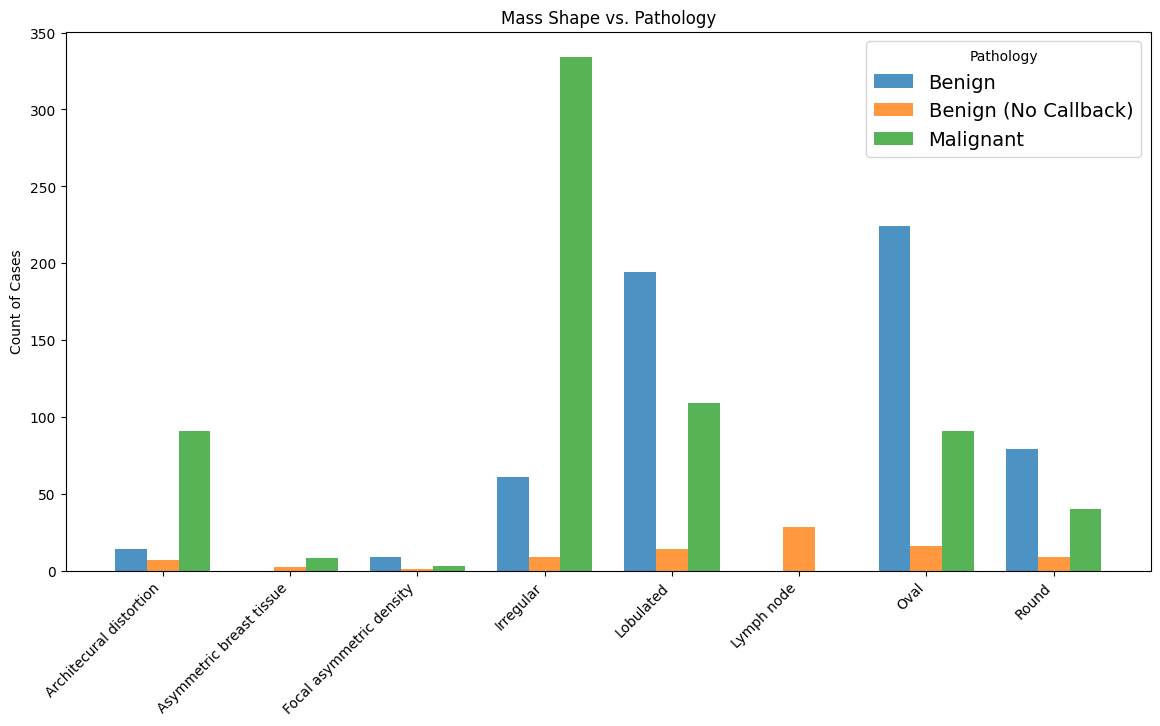

In [ ]:
#Grouped bar plot for mass shapes correlation
mass_shapes = ['shape_is_ARCHITECTURAL_DISTORTION', 'shape_is_ASYMMETRIC_BREAST_TISSUE', 'shape_is_FOCAL_ASYMMETRIC_DENSITY',	'shape_is_IRREGULAR', 'shape_is_LOBULATED',	'shape_is_LYMPH_NODE',	'shape_is_OVAL',	'shape_is_ROUND']

#Prepare bar plot
def prepare_bar_plot_data(new_train_set, mass_shapes):
  pathology_cols = ['pathology_BENIGN','pathology_BENIGN_WITHOUT_CALLBACK', 'pathology_MALIGNANT']
  shape_labels = ['Architecural distortion', 'Asymmetric breast tissue', 'Focal asymmetric density', 'Irregular', 'Lobulated', 'Lymph node', 'Oval', 'Round']

  #Calculate data counts of mass shapes in each pathology column
  data_counts = {}
  for path_col in pathology_cols:
    true_pathology = new_train_set[new_train_set[path_col] == True].copy()

    counts = []
    for shape_col in mass_shapes:
      count = true_pathology[shape_col].astype(int).sum()
      counts.append(count)

    data_counts[path_col] = counts

  return shape_labels, data_counts
shapes, counts_dict = prepare_bar_plot_data(new_train_set, mass_shapes)

#Setup figure
plt.figure(figsize = (14, 7))

categories = [('pathology_BENIGN', 'Benign'), ('pathology_BENIGN_WITHOUT_CALLBACK', 'Benign (No Callback)'), ('pathology_MALIGNANT', 'Malignant')]
bar_width = 0.25
x_positions = np.arange(len(shapes)) #centers bars for each shape

#Plot bars
for i, (key, label) in enumerate(categories):
  #Calculate offset for each group
  offset = (i - 1) * bar_width
  plt.bar(x_positions + offset, counts_dict[key], bar_width, label = label, alpha = 0.8)

plt.title('Mass Shape vs. Pathology')
plt.ylabel('Count of Cases')
plt.xticks(x_positions, shapes, rotation = 45, ha = 'right')
plt.legend(title = 'Pathology', fontsize = 14)
plt.show()




The bar plot shows that masses that are irregular or have architecural distortion are strongle correlated with malignancy. Meanwhile, masses that are oval, lobulated, and round in shape account for majority of benign cases. All lymph node cases are benign without callback.

In [ ]:
#Prepare test set for ANN
test_set = pd.read_csv("/content/mass_case_description_test_set (3).csv")


#Detect and remove outliers
# Using Z-score
z_scores = np.abs(stats.zscore(test_set.select_dtypes(include=np.number)))
test_set_clean = test_set[(z_scores < 3).all(axis=1)]  # remove rows with |z|>3

#Data cleaning
#remove missing values
clean_test_set = test_set.dropna()
clean_test_set

#handle categorical features
from scipy.stats import chi2_contingency
temp_test_set = test_set.dropna()

cat_cols = ["left or right breast", "image view", "abnormality type", "mass shape", "mass margins", "pathology" ]
target = "pathology"
def chi_square_score(feature: str, target: str, df: pd.DataFrame) -> float:
    table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(table)
    return p #p-value
selected_features = []

for col in cat_cols:
    p = chi_square_score(col, target, temp_test_set)
    print(f"{col}: p-value = {p:.5f}")

    if p < 0.05:
        selected_features.append(col)

print("\nSelected categorical(and numerical) features:", selected_features)


#Drop unused columns
cleaner_test_set = clean_test_set.drop([
    'left or right breast',
    'image view',
    'abnormality type',
    'image file path',      #Clean out image file paths
    'cropped image file path',
    'ROI mask file path'
], axis=1)

#One-Hot encoding for columns with single label
single_label_cols = ['pathology']
new_test_set = pd.get_dummies(cleaner_test_set, columns = single_label_cols, prefix = single_label_cols, drop_first = False)

#Multi-label binarization(mass shape)
shape_col = 'mass shape'
shape_prefix = 'shape_is'
index_col_name = 'original_index' #temporary, new column name for unique ID

#To prepare for splitting: create unique ID column for merging
new_test_set = new_test_set.reset_index().rename(columns = {'index': index_col_name})
new_test_set[shape_col].fillna('')
#Split labels
test_set_split = new_test_set[[index_col_name, shape_col]].copy()
test_set_split['labels'] = (test_set_split[shape_col].str.split('-'))

#Explode and clean up
test_set_exploded = test_set_split.explode('labels')
test_set_exploded['labels'] = test_set_exploded['labels'].str.strip()
test_set_exploded = test_set_exploded[test_set_exploded['labels'] != '']

#Create binary matrix using crosstab
encoded_shape_df = pd.crosstab(test_set_exploded[index_col_name], test_set_exploded['labels'])
#Rename columns
encoded_shape_df.columns = [f"{shape_prefix}_{col}" for col in encoded_shape_df.columns]
encoded_shape_df = encoded_shape_df.reset_index()
#merge back
new_test_set = pd.merge(new_test_set, encoded_shape_df, on = index_col_name, how = 'left')
#drop original categorical column and the temporary index column
new_test_set = new_test_set.drop([index_col_name, shape_col], axis = 1)

#Fill NaNs created by left merge
new_test_set = new_test_set.fillna(0)


#Multi-label binarization(mass shape)
margins_col = 'mass margins'
margins_prefix = 'margins_are'
index_col_name = 'original_index' #temporary, new column name for unique ID

#To prepare for splitting create unique ID column for merging
new_test_set = new_test_set.reset_index().rename(columns = {'index': index_col_name})
new_test_set[margins_col].fillna('')
#Split labels
test_set_split = new_test_set[[index_col_name, margins_col]].copy()
test_set_split['labels'] = (test_set_split[margins_col].str.split('-'))

#Explode and clean up
test_set_exploded = test_set_split.explode('labels')
test_set_exploded['labels'] = test_set_exploded['labels'].str.strip()
test_set_exploded = test_set_exploded[test_set_exploded['labels'] != '']

#Create binary matrix using crosstab
encoded_margins_df = pd.crosstab(test_set_exploded[index_col_name], test_set_exploded['labels'])
#Rename columns
encoded_margins_df.columns = [f"{margins_prefix}_{col}" for col in encoded_margins_df.columns]
encoded_margins_df = encoded_margins_df.reset_index()
#merge back
new_test_set = pd.merge(new_test_set, encoded_margins_df, on = index_col_name, how = 'left')
#drop original categorical column and the temporary index column
new_test_set = new_test_set.drop([index_col_name, margins_col], axis = 1)

#Fill NaNs created by left merge
new_test_set = new_test_set.fillna(0)
new_train_set.iloc[:, 8:16]

left or right breast: p-value = 0.16482
image view: p-value = 0.88599
abnormality type: p-value = 1.00000
mass shape: p-value = 0.00000
mass margins: p-value = 0.00000
pathology: p-value = 0.00000

Selected categorical(and numerical) features: ['mass shape', 'mass margins', 'pathology']


,shape_is_ARCHITECTURAL_DISTORTION,shape_is_ASYMMETRIC_BREAST_TISSUE,shape_is_FOCAL_ASYMMETRIC_DENSITY,shape_is_IRREGULAR,shape_is_LOBULATED,shape_is_LYMPH_NODE,shape_is_OVAL,shape_is_ROUND
0,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1268,0,0,0,1,0,0,0,0
1269,0,0,0,0,0,0,0,1
1270,0,0,0,0,0,0,0,1
1271,0,0,0,1,0,0,0,0


In [ ]:
#ANN
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Binary target: pathology_MALIGNANT
features = [
    'breast_density', 'abnormality id', 'assessment', 'subtlety',
    'shape_is_ARCHITECTURAL_DISTORTION', 'shape_is_ASYMMETRIC_BREAST_TISSUE', 'shape_is_FOCAL_ASYMMETRIC_DENSITY',  'shape_is_IRREGULAR', 'shape_is_LOBULATED', 'shape_is_LYMPH_NODE',  'shape_is_OVAL',  'shape_is_ROUND',
    ]
X_train = new_train_set[features]
y_train = new_train_set['pathology_MALIGNANT']
#X_test and y_test come directly from new_test_set instead of splitting
X_test = new_test_set[features].values
y_test = new_test_set['pathology_MALIGNANT'].values

#Resampling
df_train = pd.concat([X_train, y_train], axis=1)
df_malignant = df_train[df_train['pathology_MALIGNANT'] == 1]
df_benign = df_train[df_train['pathology_MALIGNANT'] == 0]

df_malignant_oversampled = resample(df_malignant, replace = True, n_samples=len(df_benign), random_state = 42)
df_oversampled = pd.concat([df_benign, df_malignant_oversampled])
X_train = df_oversampled[features].values
y_train = df_oversampled['pathology_MALIGNANT'].values
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train ANN with three hidden layers
# First layer: 8 neurons, Second layer: 4 neurons, Third layer: 4 neurons
mlp = MLPClassifier(hidden_layer_sizes=(8, 4, 4), activation='relu',
                    solver='adam', max_iter=1000, random_state=42,
                    alpha = 0.005, early_stopping = True)

mlp.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
y_proba = mlp.predict_proba(X_test)[: ,1] #Probablity of malignant(Class 1)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Test Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print(classification_report(y_test, y_test_pred))




Train Accuracy: 0.8323029366306027
Test Accuracy: 0.7617728531855956
Test Precision: 0.7526552287581699
Recall: 0.7567209450830141
F1-score: 0.7542896036469545
Confusion Matrix:
 [[169  47]
 [ 39 106]]
              precision    recall  f1-score   support

       False       0.81      0.78      0.80       216
        True       0.69      0.73      0.71       145

    accuracy                           0.76       361
   macro avg       0.75      0.76      0.75       361
weighted avg       0.76      0.76      0.76       361



Model caught 73% of malignant tumors(27% were false negatives). Recall is the biggest issue

HYPERPARAMETER TUNING(Using Keras Tuner(Random search))

In [ ]:
!pip install keras_tuner

USING CODE FROM ANOTHER CREATOR

CITATION:
* Title: Mastering Hyperparameter Tuning for Neural Networks with Keras Tuner
* Author: Piyush Kashyap

* Date: Nov 2, 2024
* Source: https://medium.com/@piyushkashyap045/mastering-hyperparameter-tuning-for-neural-networks-with-keras-tuner-c0b64d549188


In [ ]:
#Defining Model and Hyperparamters
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.metrics import Recall
from keras_tuner import RandomSearch, Objective
from keras_tuner.tuners import RandomSearch



#Model-building function

def get_model_builder(input_dim):
  def build_model(hp):

      model = Sequential()
      model.add(Input(shape=(input_dim, )))
      #Tune Learning Rate and Optimizer
      optimizer_choice = hp.Choice('optimizer', values=['adam', 'sgd'])

      if optimizer_choice == 'adam':
          lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
          optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
      else: # sgd
          optimizer = tf.keras.optimizers.SGD()

      #Tune the number of layers
      for i in range(hp.Int('num_layers', min_value=1, max_value=3)):
          model.add(Dense(units=hp.Int('units_' + str(i),
                                      min_value=32,
                                      max_value=128,
                                      step=32),
                          activation='relu'))

      model.add(Dense(1, activation='sigmoid'))
      model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
                    loss='binary_crossentropy',
                    metrics=['accuracy', Recall(name= 'recall_1')])
      return model
  return build_model

tuner_build_fn = get_model_builder(input_dim=12)
#Initializing Random Search
tuner = RandomSearch(
    tuner_build_fn,
    objective=Objective('val_recall_1', direction = 'max'), #Optimizing for Malignant Recall
    max_trials=5,  #number of combinations to try
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='mass cases vs. malignancy'
)

#Performing hyperparameter tuning
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
#Fetching the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
#Fetching the best train Keras model
model = tuner.get_best_models(num_models=1)[0]
#Training the final model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Reloading Tuner from hyperparam_tuning/mass cases vs. malignancy/tuner0.json


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8666 - loss: 0.3649 - recall_1: 0.8554 - val_accuracy: 0.7839 - val_loss: 0.4788 - val_recall_1: 0.7448
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8537 - loss: 0.3637 - recall_1: 0.8281 - val_accuracy: 0.7839 - val_loss: 0.4717 - val_recall_1: 0.7448
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8538 - loss: 0.3484 - recall_1: 0.8379 - val_accuracy: 0.7867 - val_loss: 0.4655 - val_recall_1: 0.7517
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8630 - loss: 0.3472 - recall_1: 0.8356 - val_accuracy: 0.7839 - val_loss: 0.4636 - val_recall_1: 0.7448
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8432 - loss: 0.3554 - recall_1: 0.8263 - val_accuracy: 0.7867 - val_loss: 0.4610 - val_recall_1: 0.7517
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8508 - loss: 0.3509 - recall_1: 0.8232 - val_accuracy: 0.7922 - val_loss: 0.4582 - val_rec

In [ ]:
#Generate probabilities
y_proba_test = model.predict(X_test)
y_proba_train = model.predict(X_train)

#Convert probabilities to binary predictions
y_test_pred = np.round(y_proba_test).astype(int).flatten()
y_train_pred = np.round(y_proba_train).astype(int).flatten()

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


Now that hyperparameters have been tuned, evaluate metrics: Accuracy, Precision, Recall, F1-score, Sensitivity, Confusion Matrix.

In [ ]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Test Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print(classification_report(y_test, y_test_pred))


Train Accuracy: 0.8786707882534776
Test Accuracy: 0.7894736842105263
Test Precision: 0.7821428571428571
Recall: 0.7900702426564497
F1-score: 0.7844708396178984
Confusion Matrix:
 [[170  46]
 [ 30 115]]
              precision    recall  f1-score   support

       False       0.85      0.79      0.82       216
        True       0.71      0.79      0.75       145

    accuracy                           0.79       361
   macro avg       0.78      0.79      0.78       361
weighted avg       0.80      0.79      0.79       361



Improved metrics. It is important to note the biggest concern(low recall rate). Recall rate is higher now(80 compared to 73), meaning 7% decrease in false negatives

PRINCIPLE COMPONENT ANALYSIS

In [ ]:
from sklearn.decomposition import PCA

Determine optimal number of components


In [ ]:
#Determine optimal number of components
pca_variance = PCA(n_components=0.9)
pca_variance.fit(X_train)
optimal_N = pca_variance.n_components_
print("Number of components for PCA features: ")
print(optimal_N)
print("Original Feature Count: ")
print(X_train.shape[1])

Number of components for PCA features: 
10
Original Feature Count: 
12


In [ ]:
pca = PCA(n_components= optimal_N, random_state= 42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("Classification with PCA - Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Classification with PCA - Test Accuracy: 0.7894736842105263
              precision    recall  f1-score   support

       False       0.85      0.79      0.82       216
        True       0.71      0.79      0.75       145

    accuracy                           0.79       361
   macro avg       0.78      0.79      0.78       361
weighted avg       0.80      0.79      0.79       361



Repeat the training, hyperparameter tuning, and evaluation steps to see how dimensionality reduction affects performance

In [ ]:
#ANN

#Convert X_train_pca to df before resampling
y_train = new_train_set['pathology_MALIGNANT']
pca_feature_names = ['PC_0', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9']
df_train = pd.DataFrame(X_train_pca, columns=pca_feature_names)
df_train['pathology_MALIGNANT'] = y_train

#Resampling
df_malignant = df_train[df_train['pathology_MALIGNANT'] == 1]
df_benign = df_train[df_train['pathology_MALIGNANT'] == 0]

df_malignant_oversampled = resample(df_malignant, replace = True, n_samples=len(df_benign), random_state = 42)
df_oversampled = pd.concat([df_benign, df_malignant_oversampled])
X_train_pca_resampled = df_oversampled[pca_feature_names].values
y_train_resampled = df_oversampled['pathology_MALIGNANT'].values.astype(int)

# Create and train ANN with three hidden layers
# First layer: 8 neurons, Second layer: 4 neurons, Third layer: 4 neurons
mlp = MLPClassifier(hidden_layer_sizes=(8, 4, 4), activation='relu',
                    solver='adam', max_iter=1000, random_state=42,
                    alpha = 0.005, early_stopping = True)

mlp.fit(X_train_pca_resampled, y_train_resampled)

# Predict and evaluate
y_train_pred = mlp.predict(X_train_pca_resampled)
y_test_pred = mlp.predict(X_test_pca)
y_proba = mlp.predict_proba(X_test_pca)[: ,1] #Probablity of malignant(Class 1)

print("Train Accuracy:", accuracy_score(y_train_resampled, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Test Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print(classification_report(y_test, y_test_pred))




Train Accuracy: 0.5324574961360123
Test Accuracy: 0.7063711911357341
Test Precision: 0.6941489361702128
Recall: 0.6922892720306513
F1-score: 0.6931256816577918
Confusion Matrix:
 [[165  51]
 [ 55  90]]
              precision    recall  f1-score   support

       False       0.75      0.76      0.76       216
        True       0.64      0.62      0.63       145

    accuracy                           0.71       361
   macro avg       0.69      0.69      0.69       361
weighted avg       0.71      0.71      0.71       361



In [ ]:
tuner_build_fn = get_model_builder(input_dim=10)
# Initializing Random Search
tuner = RandomSearch(
    tuner_build_fn,
    objective=Objective('val_f1_score', direction = 'max'), #Optimizing for Malignant Recall
    max_trials=5,  #number of combinations to try
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='mass cases vs. malignancy_PCA_'
)
#Performing hyperparameter tuning
tuner.search(X_train_pca_resampled, y_train_resampled, epochs=10, validation_data=(X_test_pca, y_test))
#Fetching the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
#Fetching the best train Keras model
model = tuner.get_best_models(num_models=1)[0]
#Training the final model
model.fit(X_train_pca_resampled, y_train_resampled, epochs=50, validation_data=(X_test_pca, y_test))


Trial 5 Complete [00h 00m 05s]
val_recall_1: 0.834482729434967

Best val_recall_1 So Far: 0.834482729434967
Total elapsed time: 00h 00m 54s
Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5751 - loss: 0.6813 - recall_1: 0.7080 - val_accuracy: 0.6510 - val_loss: 0.6604 - val_recall_1: 0.6621
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5746 - loss: 0.6747 - recall_1: 0.5878 - val_accuracy: 0.6371 - val_loss: 0.6643 - val_recall_1: 0.7517
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5620 - loss: 0.6783 - recall_1: 0.6068 - val_accuracy: 0.6316 - val_loss: 0.6655 - val_recall_1: 0.7103
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5760 - loss: 0.6757 - recall_1: 0.6266 - val_accuracy: 0.6288 - val_loss: 0.6651 - val_recall_1: 0.6966
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5757 - loss: 0.6755 - recall_1: 0.6418 - val_accuracy: 0.6316 - val_loss: 0.6681 - val_recall_1: 0.7241
Epoch 6/50
41/41 ━

In [ ]:
#Generate probabilities
y_proba_test_pca = model.predict(X_test_pca)
y_proba_train_pca = model.predict(X_train_pca_resampled)

#Convert probabilities to binary predictions
y_test_pred_pca = np.round(y_proba_test_pca).astype(int).flatten()
y_train_pred_pca = np.round(y_proba_train_pca).astype(int).flatten()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


EVALUATE AFTER PCA AND HYPERPARAMETER TUNING

In [ ]:
print("Train Accuracy:", accuracy_score(y_train_resampled, y_train_pred_pca))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_pca))
test_precision = precision_score(y_test, y_test_pred_pca, average='macro')
test_recall = recall_score(y_test, y_test_pred_pca, average='macro')
f1 = f1_score(y_test, y_test_pred_pca, average='macro')
conf_matrix = confusion_matrix(y_test, y_test_pred_pca)

print("Test Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print(classification_report(y_test, y_test_pred_pca))


Train Accuracy: 0.6437403400309119
Test Accuracy: 0.556786703601108
Test Precision: 0.5627194333230674
Recall: 0.5650223499361431
F1-score: 0.5546508758943992
Confusion Matrix:
 [[113 103]
 [ 57  88]]
              precision    recall  f1-score   support

       False       0.66      0.52      0.59       216
        True       0.46      0.61      0.52       145

    accuracy                           0.56       361
   macro avg       0.56      0.57      0.55       361
weighted avg       0.58      0.56      0.56       361



CONCLUSION: PCA removed features that were important towards training. Metrics decreased dramatically.
SOLUTION: ABANDON PCA